## Assumptions in Linear Regression

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.stats import probplot

In [19]:
columns = ['CRIM','ZN', 'INDUS','CHAS', 'NOX', 'RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [20]:
dataframe = pd.read_csv('housing.csv.xls', header=None, delimiter=r"\s+", names=columns)

In [81]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Linearity Assumption in Linear Regresion

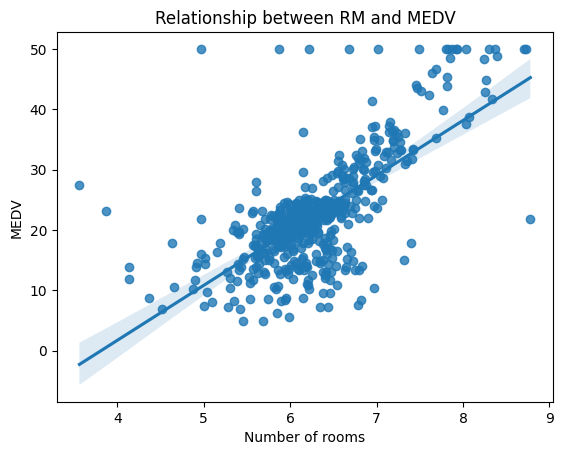

In [82]:
sns.regplot(x = dataframe['RM'] , y = dataframe['MEDV'])
plt.title("Relationship between RM and MEDV")
plt.xlabel("Number of rooms")
plt.ylabel("MEDV")
plt.show()

##### Using log transformation

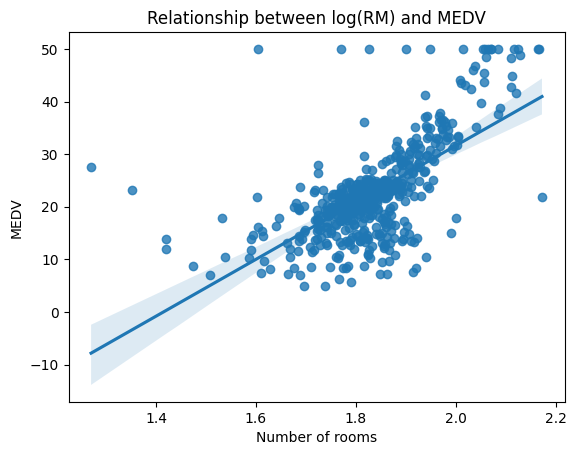

In [83]:
sns.regplot(x = np.log(dataframe['RM']) , y = dataframe['MEDV'])
plt.title("Relationship between log(RM) and MEDV")
plt.xlabel("Number of rooms")
plt.ylabel("MEDV")
plt.show()

##### Using Min-Max Scalar transformation

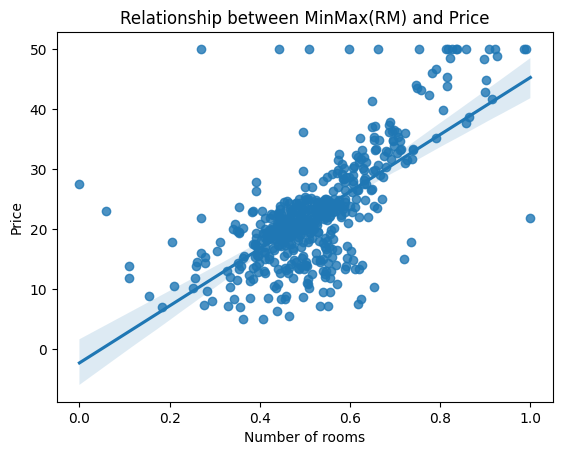

In [50]:
# min-max scalar
min_max_scalar = preprocessing.MinMaxScaler()

RM_scaled = min_max_scalar.fit_transform(np.array(dataframe['RM']).reshape(-1,1))
RM_scaled.tolist()
sns.regplot(x = RM_scaled, y = dataframe['MEDV'])
plt.title("Relationship between MinMax(RM) and Price")
plt.xlabel("Number of rooms")
plt.ylabel("Price")
plt.show()


### Homoscedasticity  Assumption

In [61]:
# seperating dependent and independent variables from dataset
X = dataframe.drop('MEDV' , axis=1)
y =dataframe['MEDV']

# spliting datset into training and testing
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# loading the regression model
LR_model = LinearRegression()

# fitting trainin and testing dataset
LR_model.fit(X_train , y_train)

# predicting the target values
y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test)

# Calculating Mean Squared error to analyse our model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# printing MSE
print("Training set MSE: ", mse_train)
print("Testing set MSE: ", mse_test)

Training set MSE:  21.641412753226312
Testing set MSE:  24.29111947497418


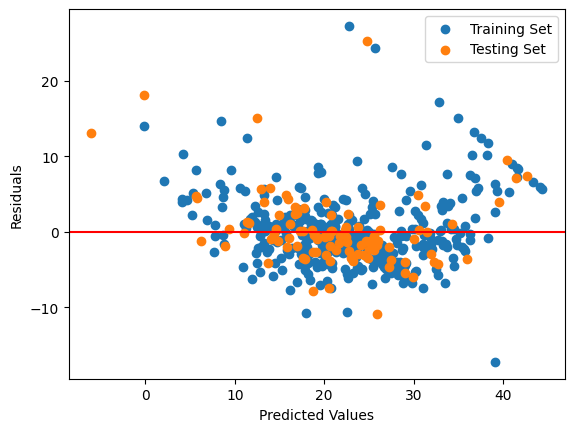

In [62]:
# calculating residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

#plotting for checking Homoscedasticity
plt.scatter(y_pred_train, residuals_train, label='Training Set')
plt.scatter(y_pred_test, residuals_test, label='Testing Set')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Muilticollinearity Assumption

<Axes: >

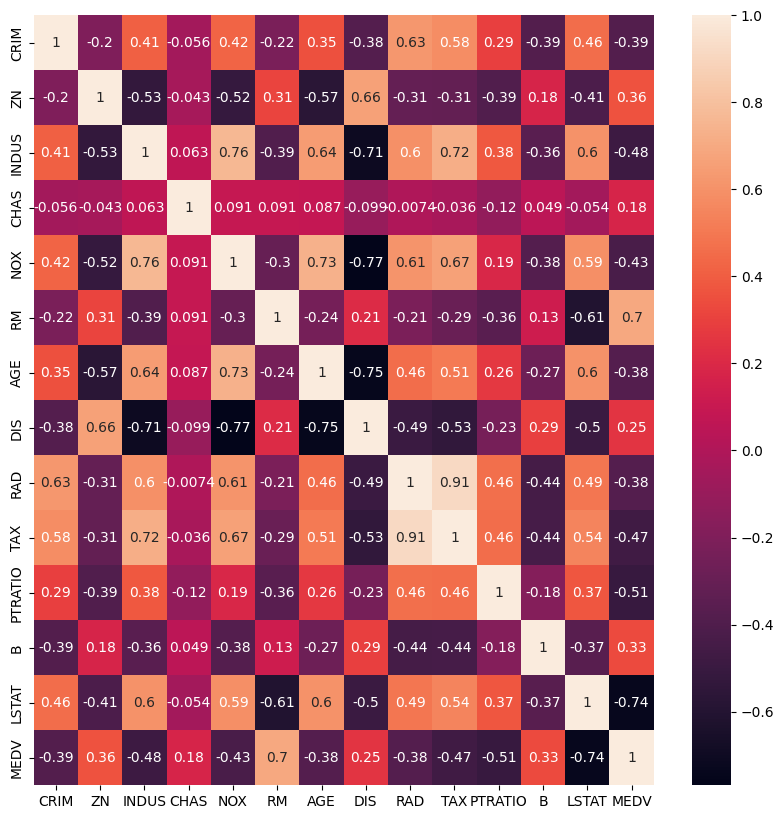

In [66]:
# calculating correlation matrix
corr_matrix = dataframe.corr()

# setting dimension of heatmap
plt.figure(figsize=(10,10))

# plotting the  matrix
sns.heatmap(corr_matrix , annot=True)

In [70]:
# loading PCA
pca = PCA()

# first normalize every feature in dataset
X_norm = (X - X.mean()) / X.std()
X_pca = pca.fit_transform(X_norm)

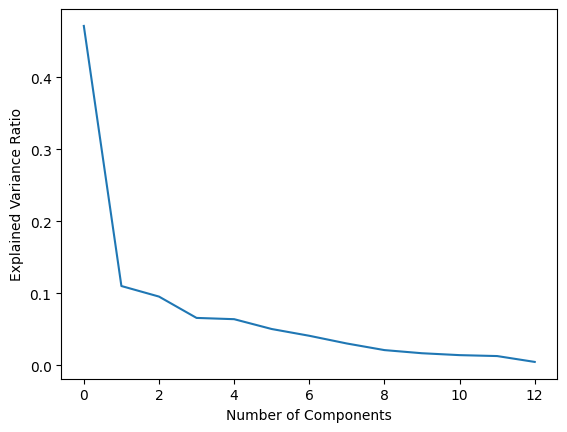

In [72]:
# ploting the graph
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

### Normality Assumption

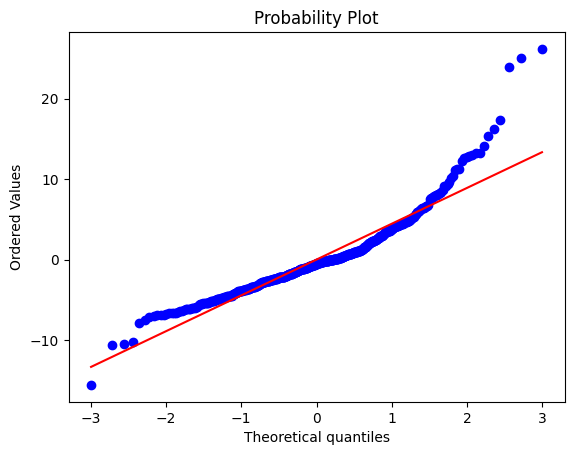

In [79]:
# fiting the dataset
LR_model.fit(X,y)

# predicting the dataset
y_pred = LR_model.predict(X)

# calculating residuals
residuals = y - y_pred

# Plot a probability plot of the residuals
probplot(residuals, plot=plt)
plt.show()

using log transformation on target variable

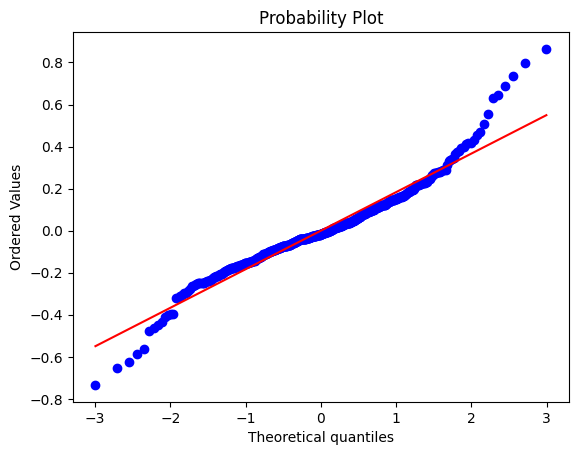

In [78]:
# applying log on target varible
y_log = np.log(y)

# fiting the dataset
LR_model.fit(X, y_log)

# predicting the dataset
y_log_pred = LR_model.predict(X)

# calculating residuals
residuals = y_log - y_log_pred

# Plot a probability plot of the residuals
probplot(residuals, plot=plt)
plt.show()